1. Scrap the data (all the numbers) for the past 14 days in the following website and plot all the numbers in the tables. Plot all the Temp, Wind, Humidity, Barometer and Visibility against Time with labels and units. Get the correct queries of the URL for the past 14 days, which keep changing daily relative to when your code is run. 
https://www.timeanddate.com/weather/hong-kong/hong-kong/historic  
The picture of temperature is for your reference(The example code is also for your reference, and you can use it.)

In [8]:
# Your Code Here

import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import date, timedelta

today = date.today()
alldate = []
for i in range(14):
    date = today-timedelta(days=i)
    date = date.isoformat()
    datestr = ''.join(date.split('-'))
    alldate.append(datestr)
alldate = alldate[::-1]
alltime=[]
alltemp=[]
allwind = []
allhumid = []
allbaro = []
allvisi = []
ndt=0
for dt in alldate:
    url = "https://www.timeanddate.com/weather/hong-kong/hong-kong/historic"
    test = {'hd': dt}
    r = requests.get(url, params=test)
    html_contents = r.text
    html_soup = BeautifulSoup(html_contents, 'html.parser')
    
    table_body = html_soup.find('table', id="wt-his").find('tbody')
    
    for row in table_body.find_all('tr'):
        tmp=row.find('th').text
        alltime.append(float(tmp[0:2]+'.'+tmp[3:5])+24*ndt)
        alltemp.append(float(row.find_all('td')[1].text[0:2]))
        allwind.append(float(row.find_all('td')[3].text[0:2]))
        allhumid.append(float(row.find_all('td')[5].text[0:-1]))
        allbaro.append(float(row.find_all('td')[6].text[0:4]))
        visi = row.find_all('td')[7].text
        if "N" in visi:
            allvisi.append(float('nan'))
        else:
            allvisi.append(float(visi[:-2]))
        
    ndt=ndt+1

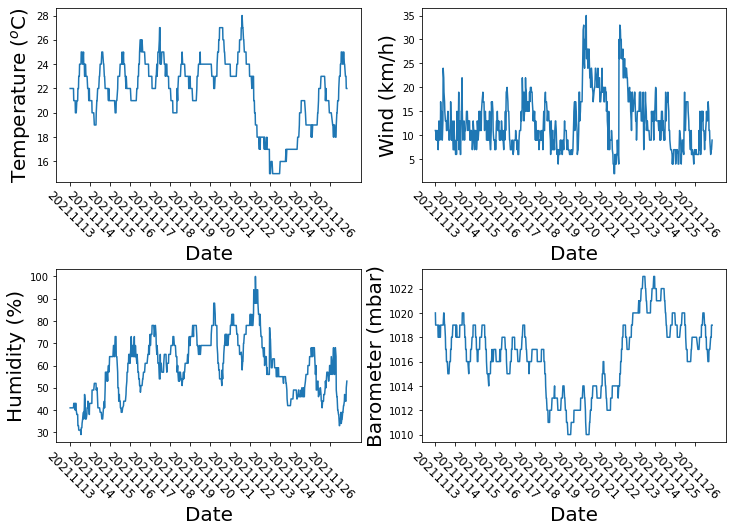

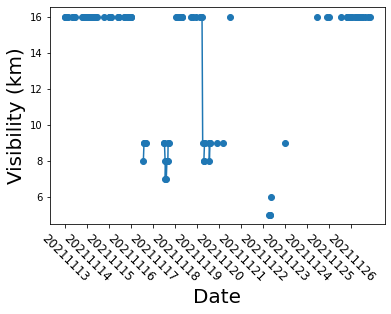

In [11]:
fig,ax = plt.subplots(2,2,figsize = (12,8))
plt.subplots_adjust(wspace =0.2, hspace =0.5)
ylabel_list = ["Temperature ($^o$C)","Wind (km/h)","Humidity (%)","Barometer (mbar)"]
y_list = [alltemp,allwind,allhumid,allbaro]
for i in range(2):
    for j in range(2):
        
        ax[i][j].plot(alltime,y_list[i*2+j])
        
        ax[i][j].set_xticks(np.linspace(0,ndt*24,ndt,endpoint=False))
        ax[i][j].set_xticklabels(labels=alldate,rotation=-45,fontsize = 12)
        ax[i][j].set_xlabel('Date',fontsize=20)
        ax[i][j].set_ylabel(ylabel_list[i*2+j],fontsize=20);
fig2,ax2 = plt.subplots()
ax2.plot(alltime,allvisi,marker = 'o')
ax2.set_xticks(np.linspace(0,ndt*24,ndt,endpoint=False))
ax2.set_xticklabels(labels=alldate,rotation=-45,fontsize = 12)
ax2.set_xlabel('Date',fontsize=20)
ax2.set_ylabel("Visibility (km)",fontsize=20);
plt.show()

2. Scrap the title of the first 10000 results from the below website  
 - https://arxiv.org/search/?searchtype=all&query=condensed+matter&abstracts=show&size=200&order=-announced_date_first&start=0

Remove the preposition and create the word clouds like the first picture below.
Pick the ten most occurring words and plot an area plot like the second picture below based on the originally announced date.


hint:
 - you can use the “start=” to get more results.
 - In case we are banned from the website, scrap the data at home and with a time delay(e.g. time.sleep(1)) between the two visit
 - common prepositions: above, across, against, along, among, around, at, before, behind, below, beneath, beside, between, by, down, from, in, into, near, of, off, on, to, toward, under, upon, with and within
 - wordcloud: https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-download-auto-examples-simple-py
 - no need to show the same format but need to show the data clearly

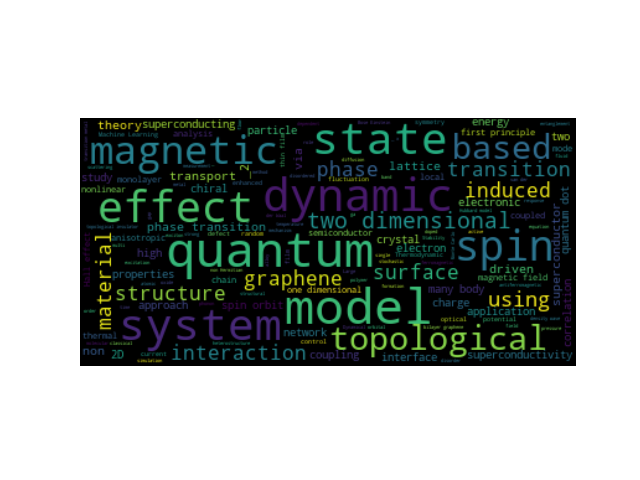


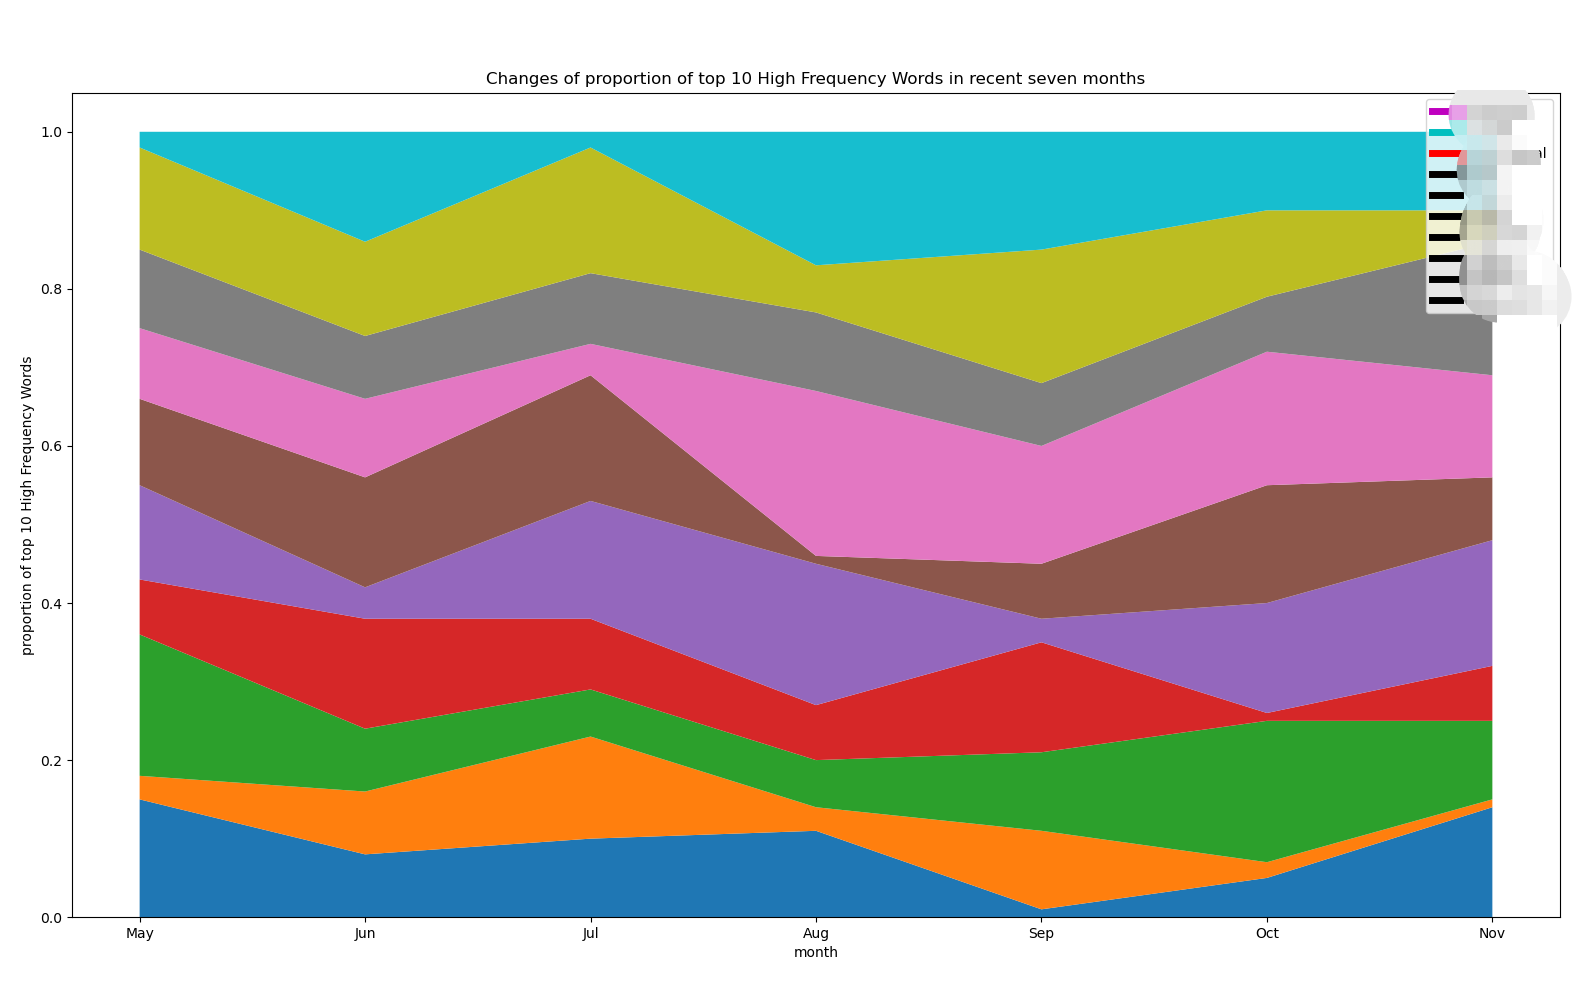

## (1)Create the word clouds

### (a)Get data from the websites

In [27]:
# Your Code Here
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
all_text = ''
for start in [i*200 for i in range(50)]:
    url = "https://arxiv.org/search/?searchtype=all&query=condensed+matter&abstracts=show&size=200&order=-announced_date_first&start="+str(start)
    r = requests.get(url)
    html_contents = r.text
    html_soup = BeautifulSoup(html_contents,'html.parser')
    ol_body = html_soup.find('ol')
    for title in ol_body.find_all('li'):
        tmp = title.find_all('p')[1].text
        lower = tmp.lower()
        all_text = all_text+lower

### (b)Do the data cleaning and analysis

In [51]:

m = all_text
for ch in ['--',':','(',')','\n','$','\\','/','{','}','<','>','?','*','!','&','_',',','.',
          '|','+','=','#','"',"'",'[',']','^','~']:
    m = m.replace(ch," ")
all_words = m.split()
all_words = sorted(all_words)[::-1]
for i in range(len(all_words)):
    if all_words[i] in '123456789-':
        all_words = all_words[:i]
        break
# print(len(all_words))
useless_words = ['a','an','the','and','with','of','in','to','by','for','on','up','down',
                'out','at','from']
all_words_cleaning = set(all_words)-set(useless_words)

counts = {}
my_wordcloud_txt = []
for word in all_words_cleaning:
    counts[word] = 0
for word in all_words:
    if word in all_words_cleaning:
        counts[word] = counts[word]+1
items = list(counts.items())
items.sort(key=lambda x:x[1],reverse=True)
top_10_words = items[:10]

### (c)Generate the wordcloud according to the word frequencies

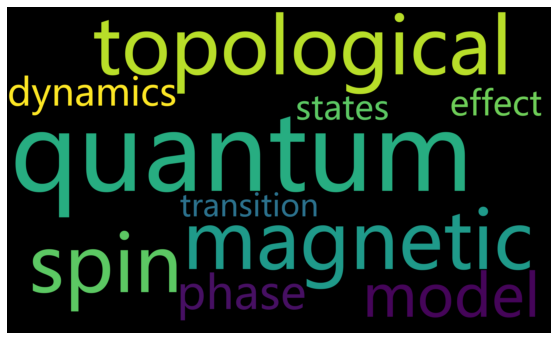

In [140]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
w=WordCloud(\
    width=5000,height=3000,\
    background_color="black",
    max_words=10,
    font_path="msyh.ttc"
    )
w_text = {}
for k in top_10_words:
    w_text[k[0]] = k[1]
w.generate_from_frequencies(w_text)
fig,ax = plt.subplots(figsize = (10,6))
ax.imshow(w ,interpolation='bilinear')
plt.axis("off")
plt.show()

## (2)Plot the area plot of the top ten words

In [125]:
Month_to_number = {"January":1,"February":2,
                  "March":3,"April":4,
                  "May":5,"June":6,
                  "July":7,"August":8,
                  "September":9,"October":10,
                   "November":11,"December":12}
number_to_Month = {1:"January",2:"February",
                  3:"March",4:"April",
                  5:"May",6:"June",
                  7:"July",8:"August",
                  9:"September",10:"October",
                   11:"November",12:"December"}

### (a)Scrap the data from the websites and do the counting

In [111]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import date, timedelta
count_month = [{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]
today = date.today()
today_month = int(today.isoformat().split('-')[1])
all_text = ''
check_down = 0
words_to_count = [k[0] for k in top_10_words]
k = 0
for start in [i*200 for i in range(50)]:
    url = "https://arxiv.org/search/advanced?advanced=&terms-0-term=condensed+matter&terms-0-operator=AND&terms-0-field=all&classification-physics_archives=all&classification-include_cross_list=include&date-filter_by=past_12&date-year=&date-from_date=&date-to_date=&date-date_type=submitted_date&abstracts=show&size=200&order=-announced_date_first&start="+str(start)
    r = requests.get(url)
    html_contents = r.text
    html_soup = BeautifulSoup(html_contents,'html.parser')
    ol_body = html_soup.find('ol')
    for title in ol_body.find_all('li'):
        line = title.find_all('p')[1].text.lower()
        tmp = title.find_all('p')[4].text.split()[-2]
#         print(title.find_all('p')[4].text.split())
#         print(tmp)

        month = Month_to_number[tmp]
        if month<today_month-6:
            check_down = 1
            break
        for word in words_to_count:
            if word in line:
                count_month[month-1][word]= count_month[month-1].get(word,0) + 1
#     if start==400:
#         break
    if check_down == 1:
        break

### (b)Calculate the proportion and plot the area plot

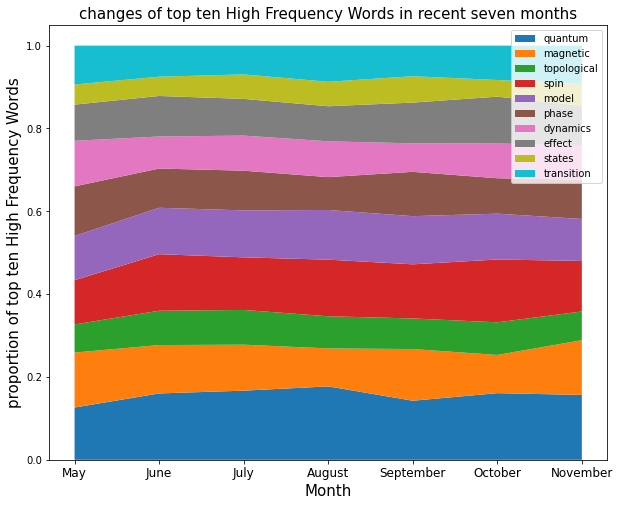

In [141]:

## set recent 7 months
x = []
for i in range(len(count_month)):
    if count_month[i]:
        x.append(i+1)

## set proportion of different words in each months of all these ten words
y = {}
for word_index in range(len(words_to_count)):
    y[words_to_count[word_index]] = [count_month[i-1][words_to_count[word_index]]
                                     /sum(count_month[i-1].values()) for i in x]
fig,ax = plt.subplots(figsize=(10,8))
ax.stackplot(x,y.values(),labels = y.keys())
ax.set_xticks(x)
ax.set_xticklabels([number_to_Month[m] for m in x],fontsize = 12)
ax.set_title("changes of top ten High Frequency Words in recent seven months",fontsize = 15)
ax.set_ylabel("proportion of top ten High Frequency Words",fontsize = 15)
ax.set_xlabel("Month",fontsize = 15)
plt.legend(fontsize = 10)
plt.show()

3. Fourier transform analysis
### (optional)

Scrapt the data for new cases and deaths in UK and apply Fast Fourier transform(FFT) to find the wave cycle.


https://www.google.com/search?q=covid+19+uk&sxsrf=AOaemvKeQdnU1csQtfl4gdT6Om0ZE3U5Xg%3A1636477042026&ei=cqiKYbR-j-3QBJyjooAE&oq=covid+19+uk&gs_lcp=Cgdnd3Mtd2l6EAMyBwgAEEcQsAMyBwgAEEcQsAMyBwgAEEcQsAMyBwgAEEcQsAMyBwgAEEcQsAMyBwgAEEcQsAMyBwgAEEcQsAMyBwgAEEcQsAMyBwgAELADEEMyBwgAELADEENKBAhBGABQAFgAYIgVaAFwAngAgAEAiAEAkgEAmAEAyAEKwAEB&sclient=gws-wiz&ved=0ahUKEwi0_5aG4Iv0AhWPNpQKHZyRCEAQ4dUDCA4&uact=5
    

In [ ]:
# Your Code Here
